In [1]:
import math
import re
import glob
import os

from collections import Counter
import pandas as pd
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
mal_path = "malicious_pure/"

In [3]:
# make dataset csv and add labels
def load_scripts_into_dataframe(folder_path, label):
    script_list = []
    
    # Traverse through the folder and read each PowerShell script
    for file_path in glob.glob(os.path.join(folder_path, '*.ps1')):
        with open(file_path, 'r') as file:
            script_content = file.read()
            script_list.append((script_content, label))
    
    # Create a DataFrame with 'script' and 'label' columns
    df = pd.DataFrame(script_list, columns=['script', 'label'])
    
    return df

In [4]:
malicious_df = load_scripts_into_dataframe(mal_path, label=0)

In [5]:
malicious_df

,script,label
0,"\n$c = '[DllImport(""kernel32.dll"")]public stat...",0
1,\n(New-Object System.Net.WebClient).DownloadFi...,0
2,"\n$x=$Env:username;$u=""http://54.213.195.138/s...",0
3,\n(New-Object System.Net.WebClient).DownloadFi...,0
4,\n(New-Object System.Net.WebClient).DownloadFi...,0
...,...,...
4197,\n(New-Object System.Net.WebClient).DownloadFi...,0
4198,"\n$c = '[DllImport(""kernel32.dll"")]public stat...",0
4199,"\n$gbE = '[DllImport(""kernel32.dll"")]public st...",0
4200,\n(New-Object System.Net.WebClient).DownloadFi...,0


In [6]:
def clean_script(script):
    # Remove comments from the script
    script = re.sub(r'#.*$', ' ', script, flags=re.MULTILINE)
    
    # Remove special characters and reduce consecutive spaces
    cleaned_script = re.sub(r'\s+', ' ', script)
    
    # Remove tabs and newlines
    cleaned_script = cleaned_script.replace('\t', ' ').replace('\n', ' ')
    
    # Remove punctuation
    cleaned_script = re.sub(r'[^\w\s]', ' ', cleaned_script).lower()
    
    return cleaned_script

In [7]:
malicious_df.loc[:, 'cleaned_script'] = malicious_df['script'].apply(clean_script)


In [8]:
malicious_df

,script,label,cleaned_script
0,"\n$c = '[DllImport(""kernel32.dll"")]public stat...",0,c dllimport kernel32 dll public stati...
1,\n(New-Object System.Net.WebClient).DownloadFi...,0,new object system net webclient downloadfil...
2,"\n$x=$Env:username;$u=""http://54.213.195.138/s...",0,x env username u http 54 213 195 138 s2...
3,\n(New-Object System.Net.WebClient).DownloadFi...,0,new object system net webclient downloadfil...
4,\n(New-Object System.Net.WebClient).DownloadFi...,0,new object system net webclient downloadfil...
...,...,...,...
4197,\n(New-Object System.Net.WebClient).DownloadFi...,0,new object system net webclient downloadfil...
4198,"\n$c = '[DllImport(""kernel32.dll"")]public stat...",0,c dllimport kernel32 dll public stati...
4199,"\n$gbE = '[DllImport(""kernel32.dll"")]public st...",0,gbe dllimport kernel32 dll public sta...
4200,\n(New-Object System.Net.WebClient).DownloadFi...,0,new object system net webclient downloadfil...


In [9]:
import pickle
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest

# Load the TF-IDF vectorizer
with open('mix_vectorizer.pkl', 'rb') as file:
    vectorizer = pickle.load(file)

# Load the SelectKBest instance
with open('mix_selector.pkl', 'rb') as file:
    selector = pickle.load(file)

# Load the selected feature names DataFrame
X_selected_df = pd.read_pickle('mix_selected_features.pkl')

# Assuming 'new_data' contains your new data
# Apply the TF-IDF vectorizer to the new data
X_tfidf = vectorizer.transform(malicious_df['cleaned_script'])

# Apply the loaded SelectKBest instance to the TF-IDF transformed data
X_new_selected = selector.transform(X_tfidf)

# Convert the selected features to a DataFrame using the previously selected feature names
X_new_selected_df = pd.DataFrame(X_new_selected.toarray(), columns=X_selected_df.columns)


In [10]:
X_new_selected_df

,0x00,0x00 0x00,0x00 0x00 0x00,0x00 0x00 0x29,0x00 0x00 0x56,0x00 0x00 0x60,0x00 0x00 0x68,0x00 0x10,0x00 0x10 0x00,0x00 0x29,...,win32 namespace,win32 namespace win32functions,win32functions,win32functions passthru,win32functions passthru byte,winx64,winx64 exe,yahoo,yahoo csrsv,yahoo csrsv exe
0,0.263648,0.099541,0.019969,0.020224,0.020224,0.019969,0.019969,0.019963,0.019969,0.020217,...,0.016837,0.016852,0.016848,0.016848,0.016852,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.395741,0.395741,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110330,0.111067,0.111067
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4198,0.254610,0.096129,0.019284,0.019530,0.019530,0.019284,0.019284,0.019279,0.019284,0.019524,...,0.016259,0.016274,0.016271,0.016271,0.016274,0.000000,0.000000,0.000000,0.000000,0.000000
4199,0.025556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.024480,0.024502,0.024497,0.024497,0.024502,0.000000,0.000000,0.000000,0.000000,0.000000
4200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.103056,0.103744,0.103744


In [11]:
import math
import re
from collections import Counter
import pandas as pd

# Function definitions (copied from your training notebook)
def text_length(script):
    return len(script)

def entropy(script):
    character_counts = Counter(script)
    total_characters = len(script)
    probabilities = [count / total_characters for count in character_counts.values()]
    entropy_value = -sum(probability * math.log2(probability) for probability in probabilities)
    return entropy_value

def punctuation_count(script):
    return len(re.findall(r'[^\w\s]', script))

def function_count(script):
    function_keywords = ['function', 'procedure']
    return sum(script.count(keyword) for keyword in function_keywords)

def numeric_literal_count(script):
    return len(re.findall(r'\b\d+\b', script))

def string_literal_count(script):
    return len(re.findall(r'"([^"]*)"', script))

def has_error_handling(script):
    error_handling_keywords = ['try', 'except', 'catch']
    return any(keyword in script for keyword in error_handling_keywords)

def has_urls_or_ips(script):
    return bool(re.search(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+|\d+\.\d+\.\d+\.\d+', script))

def has_obfuscation_indicators(script):
    obfuscation_patterns = [
        r'\b(?:\w+\s*\+\s*\w+)',
        r'\b(?:[a-zA-Z]\s*=\s*[^;]*\bchr\s*\(\s*\w+\s*\+\s*\d+\s*\)\s*;\s*)+',
        r'0x[\da-fA-F]+',
        r'(?:\\x[0-9a-fA-F]{2}|\\u[0-9a-fA-F]{4}|\\U[0-9a-fA-F]{8})',
        r'\b(?:Add-Type|dllimport|virtualalloc|createthread|memset)\b',
        r'\b(?:eval|exec|decode|encode|obfuscate)\b'
    ]
    return any(re.search(pattern, script) for pattern in obfuscation_patterns)

def has_suspicious_words(script):
    disclosure_keywords = ['downloadfile','password', 'secret', 'key', 'token', 'downloadstring',
                          'dllimport', 'programdata', 'new object', 'appdata']
    return any(keyword in script for keyword in disclosure_keywords)

def longest_string_length(script):
    string_literals = re.findall(r'"([^"]*)"', script)
    if not string_literals:
        return 0
    longest_length = max(len(string_literal) for string_literal in string_literals)
    return longest_length


In [12]:
features = ['text_length', 'function_count',  
           'numeric_literal_count', 'has_error_handling',
           'has_obfuscation_indicators','has_suspicious_words']
functions = [text_length, function_count,
             numeric_literal_count, has_error_handling,
             has_obfuscation_indicators,has_suspicious_words]

features_ = ['Entropy', 'punctuation_count', 'longest_string_length','string_literal_count', 'has_urls_or_ips']
functions_ = [entropy, punctuation_count, longest_string_length, string_literal_count, has_urls_or_ips]

for i in range(len(functions)):
    malicious_df[features[i]] = malicious_df['cleaned_script'].apply(functions[i]).astype(int)
    
for i in range(len(functions_)):
    malicious_df[features_[i]] = malicious_df['script'].apply(functions_[i]).astype(int)
    

In [13]:
new_features = malicious_df.drop(['script', 'label', 'cleaned_script'], axis=1)


In [14]:
# Concatenate the new features DataFrame with the existing DataFrame containing selected features
X_new_selected_df_with_features = pd.concat([X_new_selected_df, new_features], axis=1)


In [15]:
X_new_selected_df_with_features

,0x00,0x00 0x00,0x00 0x00 0x00,0x00 0x00 0x29,0x00 0x00 0x56,0x00 0x00 0x60,0x00 0x00 0x68,0x00 0x10,0x00 0x10 0x00,0x00 0x29,...,function_count,numeric_literal_count,has_error_handling,has_obfuscation_indicators,has_suspicious_words,Entropy,punctuation_count,longest_string_length,string_literal_count,has_urls_or_ips
0,0.263648,0.099541,0.019969,0.020224,0.020224,0.019969,0.019969,0.019963,0.019969,0.020217,...,1,10,0,1,1,4,444,12,4,0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,4,0,0,1,5,37,23,2,1
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,4,0,0,1,5,70,31,1,1
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,4,0,0,1,5,37,22,2,1
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,1,5,35,19,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,4,0,0,1,5,35,24,2,1
4198,0.254610,0.096129,0.019284,0.019530,0.019530,0.019284,0.019284,0.019279,0.019284,0.019524,...,1,10,0,1,1,4,444,12,4,0
4199,0.025556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1,10,0,1,1,4,462,12,4,0
4200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,4,0,0,1,5,37,22,2,1


In [23]:
# Load the trained model
with open('mix_model.pkl', 'rb') as file:
    model = pickle.load(file)
    

In [24]:
# Use the model to make predictions
predicted_label = model.predict(X_new_selected_df_with_features)


In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y = malicious_df['label']
# Evaluate the model
accuracy = accuracy_score(y, predicted_label)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y, predicted_label))


Accuracy: 0.9728700618752975
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99      4202
           1       0.00      0.00      0.00         0

    accuracy                           0.97      4202
   macro avg       0.50      0.49      0.49      4202
weighted avg       1.00      0.97      0.99      4202



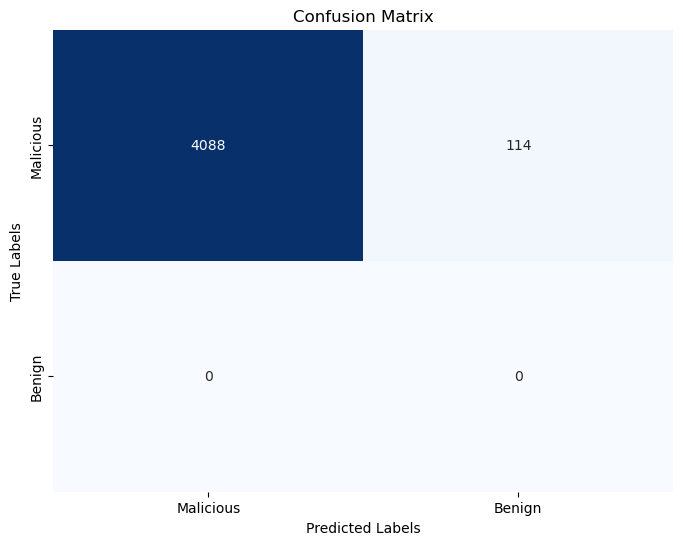

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Create confusion matrix
conf_matrix = confusion_matrix(y, predicted_label)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Malicious', 'Benign'], yticklabels=['Malicious', 'Benign'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
